In [50]:
import pandas as pd    
import numpy as np    
import matplotlib.pyplot as plt    
import seaborn as sns    
import datetime    
import warnings    
warnings.filterwarnings('ignore')

#### 1.文件读取

In [51]:
data_train = pd.read_csv('data/train.csv')
data_test_a = pd.read_csv('data/testA.csv')

#### 2.原始数据观察

##### 2.1训练集个数与维度

In [52]:
data_train.shape

(800000, 47)

##### 2.2测试集个数与维度

In [53]:
data_test_a.shape

(200000, 46)

##### 2.3数据类型

In [54]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 47 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  800000 non-null  int64  
 1   loanAmnt            800000 non-null  float64
 2   term                800000 non-null  int64  
 3   interestRate        800000 non-null  float64
 4   installment         800000 non-null  float64
 5   grade               800000 non-null  object 
 6   subGrade            800000 non-null  object 
 7   employmentTitle     799999 non-null  float64
 8   employmentLength    753201 non-null  object 
 9   homeOwnership       800000 non-null  int64  
 10  annualIncome        800000 non-null  float64
 11  verificationStatus  800000 non-null  int64  
 12  issueDate           800000 non-null  object 
 13  isDefault           800000 non-null  int64  
 14  purpose             800000 non-null  int64  
 15  postCode            799999 non-nul

### 3.数据缺失值与唯一值

There are 22 columns in train dataset with missing values.


<Axes: >

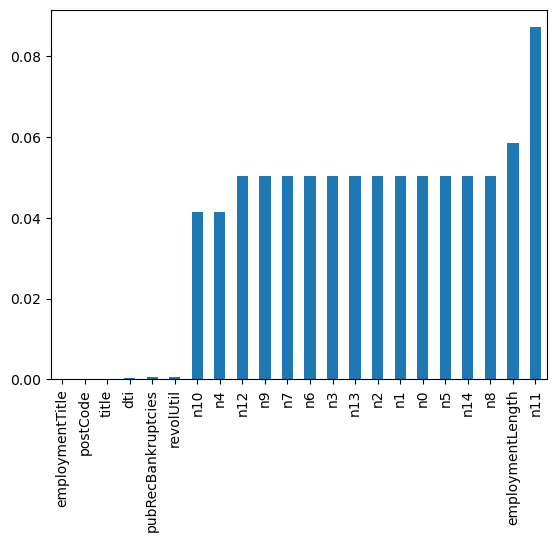

In [55]:
#总缺失值
print(f'There are {data_train.isnull().any().sum()} columns in train dataset with missing values.')
#确实率过50%的缺失值
have_null_fea_dict = (data_train.isnull().sum()/len(data_train)).to_dict()    
fea_null_moreThanHalf = {}    
for key,value in have_null_fea_dict.items():    
    if value > 0.5:    
        fea_null_moreThanHalf[key] = value
fea_null_moreThanHalf
#nan可视化    
missing = data_train.isnull().sum()/len(data_train)    
missing = missing[missing > 0]    
missing.sort_values(inplace=True)    
missing.plot.bar()

In [56]:
one_value_fea = [col for col in data_train.columns if data_train[col].nunique() <= 1]
one_value_fea_test = [col for col in data_test_a.columns if data_test_a[col].nunique() <= 1]
print(f'There are {len(one_value_fea)} columns in train dataset with one unique value.',one_value_fea)    
print(f'There are {len(one_value_fea_test)} columns in test dataset with one unique value.',one_value_fea_test)

There are 1 columns in train dataset with one unique value. ['policyCode']
There are 1 columns in test dataset with one unique value. ['policyCode']


In [57]:
#去掉唯一值与id
data_train.drop('id', axis=1, inplace = True)
data_train.drop('policyCode', axis=1, inplace = True)    

### 4.利用IV值挑选特征

In [58]:
print(toad.__version__)

0.1.0


In [59]:
'''
pd.DataFrame.iteritems = pd.DataFrame.items  # 动态替换方法
import toad  # 必须在补丁后导入
toad.quality(data_train, target='isDefault', cpu_cores=0, iv_only=False)
# PS:若只想参考IV值，可以将iv_only=True，不然需要耗费很多时间
'''

"\npd.DataFrame.iteritems = pd.DataFrame.items  # 动态替换方法\nimport toad  # 必须在补丁后导入\ntoad.quality(data_train, target='isDefault', cpu_cores=0, iv_only=False)\n# PS:若只想参考IV值，可以将iv_only=True，不然需要耗费很多时间\n"

In [60]:
# 删除无预测能力的特征
for data in [data_train, data_test_a]:
    data.drop('n5', axis=1, inplace = True)            
    data.drop('n0', axis=1, inplace = True)
    data.drop('regionCode', axis=1, inplace = True)            
    data.drop('n4', axis=1, inplace = True)
    data.drop('n13', axis=1, inplace = True)            
    data.drop('n6', axis=1, inplace = True)
    data.drop('pubRec', axis=1, inplace = True)            
    data.drop('n8', axis=1, inplace = True)
    data.drop('revolBal', axis=1, inplace = True)            
    data.drop('openAcc', axis=1, inplace = True)
    data.drop('postCode', axis=1, inplace = True)            
    data.drop('pubRecBankruptcies', axis=1, inplace = True)
    data.drop('delinquency_2years', axis=1, inplace = True)            
    data.drop('totalAcc', axis=1, inplace = True)
    data.drop('applicationType', axis=1, inplace = True)            
    data.drop('n12', axis=1, inplace = True)
    data.drop('initialListStatus', axis=1, inplace = True)            
    data.drop('n11', axis=1, inplace = True)
    data.drop('purpose', axis=1, inplace = True)            
    data.drop('n1', axis=1, inplace = True)
    data.drop('employmentLength', axis=1, inplace = True)            
    data.drop('n7', axis=1, inplace = True)          
    data.drop('n10', axis=1, inplace = True)

### 5. 数值特征与类别特征

In [61]:
# 两类特征进行分类
numerical_fea = list(data_train.select_dtypes(exclude=['object']).columns)                # 数值特征
category_fea = list(filter(lambda x: x not in numerical_fea, list(data_train.columns)))  # 类别特征 
 
# 将 label 去除
label = 'isDefault'
numerical_fea.remove(label)
# 按照中位数，填充数值型特征
data_train[numerical_fea] = data_train[numerical_fea].fillna(data_train[numerical_fea].median())
data_test_a[numerical_fea] = data_test_a[numerical_fea].fillna(data_test_a[numerical_fea].median())
# 按照众数，填充类别型特征
for cate_fea in category_fea:
    data_train[cate_fea] = data_train[cate_fea].fillna(data_train[cate_fea].mode().values[0])
    data_test_a[cate_fea] = data_test_a[cate_fea].fillna(data_test_a[cate_fea].mode().values[0])
data_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 22 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     800000 non-null  float64
 7   homeOwnership       800000 non-null  int64  
 8   annualIncome        800000 non-null  float64
 9   verificationStatus  800000 non-null  int64  
 10  issueDate           800000 non-null  object 
 11  isDefault           800000 non-null  int64  
 12  dti                 800000 non-null  float64
 13  ficoRangeLow        800000 non-null  float64
 14  ficoRangeHigh       800000 non-null  float64
 15  revolUtil           800000 non-nul

In [62]:
# 通过观察数据类型共有5个object类型，因此进行特征转换
# 1. grade贷款等级共7个等级,观察分布
data_train['grade'].value_counts()
data_train['subGrade'].value_counts()

subGrade
C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: count, dtype: int64

In [63]:
#对于有优先级的数据，采用自映射编码（其他办法？）
# 1.grade
for data in [data_train, data_test_a]:
    data['grade'] = data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})
# 2.subgrade
# 该函数用于将 subGrade 转换为数值等级
def get_sub_grade(grade, sub):
    # 处理缺失值（NaN）和浮点数
    if not isinstance(sub, str):
        return 0  # 或 grade * 10 + 0（按业务逻辑调整） 
    # 确保字符串长度足够
    if len(sub) < 2:
        return 0
    return grade*10+int(sub[1])
for data in [data_train, data_test_a]:
    data['subGrade'] = data.apply(lambda row: get_sub_grade(row['grade'],row['subGrade']), axis=1)
# 3.issueDate
import datetime
for data in [data_train, data_test_a]:
    data['issueDate'] = pd.to_datetime(data['issueDate'],format='%Y-%m-%d') # 将原始数据转换为 Pandas 的日期时间格式
    startdate = datetime.datetime.strptime('2007-06-01', '%Y-%m-%d') # '2007-06-01'设定为开始日期
    # 每个样本相对于 2007-06-01 的天数
    data['issueDateDT'] = data['issueDate'].apply(lambda x: x-startdate).dt.days # dt.days 将 Timedelta 对象转换为天数
# 4.earliesCreditLine
for data in [data_train, data_test_a]:
    data['earliesCreditLine'] = data['earliesCreditLine'].apply(lambda s: int(s[-4:])) # 只保留年份

In [65]:
# 划分数值特征中的离散型变量与连续型变量
# 划分数值型变量中的：连续变量和离散型变量
def get_numerical_serial_fea(data,feas):
    numerical_serial_fea = []                 # 连续变量
    numerical_noserial_fea = []               # 离散变量
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
        else:
            numerical_serial_fea.append(fea)
    return numerical_serial_fea,numerical_noserial_fea
numerical_serial_fea,numerical_noserial_fea = get_numerical_serial_fea(data_train,numerical_fea)
print('连续型变量：',numerical_serial_fea)
print('离散型变量：',numerical_noserial_fea)

连续型变量： ['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'revolUtil', 'title', 'n2', 'n3', 'n9', 'n14']
离散型变量： ['term', 'homeOwnership', 'verificationStatus']


In [67]:
# 特征的分布情况： 对于近似正态分布或者接近线性关系的特征，不一定需要进行分箱操作。但对于偏态分布或者存在非线性关系的特征，分箱操作可能会有所帮助。
# 特征的重要性： 在特征选择过程中，通常会评估每个特征对目标变量的重要性。如果某个连续型数值特征对目标变量的影响较大，那么对其进行分箱操作可能会提高模型性能。
# 对部分连续性变量进行分箱操作
for data in [data_train, data_test_a]:
    data['loanAmnt'] = pd.qcut(data['loanAmnt'], 10, labels=False)
    data['interestRate'] = pd.qcut(data['interestRate'].rank(method='first'), 100, labels=False)
    data['installment'] = pd.qcut(data['installment'], 100, labels=False)
    data['annualIncome'] = pd.qcut(data['annualIncome'], 10, labels=False)
    data['dti'] = pd.qcut(data['dti'], 100, labels=False)
    data['revolUtil'] = pd.qcut(data['revolUtil'], 100, labels=False)

In [69]:
data_train.to_csv('data/processed_train.csv',index=False, encoding='utf-8-sig')
data_test_a.to_csv('data/processed_test.csv',index=False, encoding='utf-8-sig')